# Feature Selection

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Load the dataset
df = pd.read_csv("../Datasets/Companies/SmallCompanies.csv")

df.head()

unique_id disbursement_date  loan_investment_amount  \
0  AK_2013_VCP_1          3/1/2013                180000.0   
1  AK_2013_VCP_3        12/30/2013                265000.0   
2  AK_2014_VCP_1         4/11/2014                199500.0   
3  AK_2014_VCP_2         5/15/2014                125000.0   
4  AK_2014_VCP_3         9/15/2014                120000.0   

   lender_insurance_premium metro_type LMI_type    revenue  \
0                       0.0      Metro  Non-LMI        0.0   
1                       0.0      Metro  Non-LMI        0.0   
2                       0.0      Metro  Non-LMI        0.0   
3                       0.0      Metro      LMI  1494916.0   
4                       0.0      Metro  Non-LMI    41000.0   

   full_time_employees  naics_code  jobs_created lender_type_category  \
0                  5.0      541511           3.0            Loan Fund   
1                  7.0      541511           2.0            Loan Fund   
2                  2.0      336612           8.0            Loan Fund   
3                  8.0      451110           8.0            Loan Fund   
4                  0.0      336612           0.0            Loan Fund   

                     optional_primary_use_of_funds  \
0  Wages, Working Capital, & Professional Services   
1  Wages, Working Capital, & Professional Services   
2  Wages, Working Capital, & Professional Services   
3  Wages, Working Capital, & Professional Services   
4  Wages, Working Capital, & Professional Services   

   optional_revenue_yr_confirmed optional_stage active_status  support_amount  
0                         2014.0    Early Stage       Unknown             0.0  
1                         2014.0    Early Stage       Unknown             0.0  
2                         2014.0    Early Stage       Unknown             0.0  
3                         2014.0    Early Stage       Unknown             0.0  
4                         2014.0    Early Stage       Unknown             0.0

In [41]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (18584, 16)


In [42]:
# Get concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      18584 non-null  object 
 1   disbursement_date              18584 non-null  object 
 2   loan_investment_amount         18584 non-null  float64
 3   lender_insurance_premium       18584 non-null  float64
 4   metro_type                     18584 non-null  object 
 5   LMI_type                       18584 non-null  object 
 6   revenue                        18584 non-null  float64
 7   full_time_employees            18584 non-null  float64
 8   naics_code                     18584 non-null  int64  
 9   jobs_created                   18584 non-null  float64
 10  lender_type_category           18584 non-null  object 
 11  optional_primary_use_of_funds  18584 non-null  object 
 12  optional_revenue_yr_confirmed  18584 non-null 

In [43]:
# Filter out the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of unique values for each categorical column
unique_counts_categorical = df[categorical_columns].nunique()

unique_counts_categorical

unique_id                        18563
disbursement_date                 1572
metro_type                           2
LMI_type                             2
lender_type_category                 6
optional_primary_use_of_funds        5
optional_stage                       5
active_status                       10
dtype: int64

In [44]:
df=df[df['active_status']!='Unknown']

In [45]:
different_active_statuses = df['active_status'].unique()

print(different_active_statuses)

['Did not attempt to confirm operations' 'Yes'
 'Attempted to confirm operations, but unable' 'Other' 'Sold' 'Exit'
 'Loss' 'Bankrupt' 'Moved']


## Encoding

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4050 entries, 778 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      4050 non-null   object 
 1   disbursement_date              4050 non-null   object 
 2   loan_investment_amount         4050 non-null   float64
 3   lender_insurance_premium       4050 non-null   float64
 4   metro_type                     4050 non-null   object 
 5   LMI_type                       4050 non-null   object 
 6   revenue                        4050 non-null   float64
 7   full_time_employees            4050 non-null   float64
 8   naics_code                     4050 non-null   int64  
 9   jobs_created                   4050 non-null   float64
 10  lender_type_category           4050 non-null   object 
 11  optional_primary_use_of_funds  4050 non-null   object 
 12  optional_revenue_yr_confirmed  4050 non-null   flo

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column
for column in df.select_dtypes(include=['object']):
    # Convert 'Yes' values to 1 and all others to 0 for 'active_status' column
    if column == 'active_status':
        df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0)
    else:
        # Apply label encoding to other categorical columns
        df[column] = label_encoder.fit_transform(df[column])

df.head()

unique_id  disbursement_date  loan_investment_amount  \
778          8                462                100000.0   
800         24                705                240000.0   
802         31                713                282000.0   
832         48                683                 50000.0   
847         57                809                 21500.0   

     lender_insurance_premium  metro_type  LMI_type     revenue  \
778                       0.0           0         1  2027806.00   
800                       0.0           0         0  1662422.00   
802                       0.0           0         0   268058.00   
832                       0.0           0         1   254153.58   
847                       0.0           0         1        0.00   

     full_time_employees  naics_code  jobs_created  lender_type_category  \
778                 12.0      541330           0.0                     0   
800                  2.0      238220           0.0                     0   
802                 11.0      722511           1.0                     0   
832                  4.0      487210           0.0                     4   
847                  1.0      453310           0.0                     0   

     optional_primary_use_of_funds  optional_revenue_yr_confirmed  \
778                              4                         2014.0   
800                              4                         2014.0   
802                              4                         2014.0   
832                              4                         2014.0   
847                              4                         2014.0   

     optional_stage  active_status  support_amount  
778               0              0         80000.0  
800               0              0        180000.0  
802               0              0        225600.0  
832               0              0         25000.0  
847               0              0         17200.0

In [48]:
frequency = df['active_status'].value_counts()
frequency = frequency.reset_index()
frequency.columns = ['active_status', 'count']
print(frequency)

   active_status  count
0              1   2398
1              0   1652


## Standardization

In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaled_df.head()

unique_id  disbursement_date  loan_investment_amount  \
0  -1.725011          -0.512192               -0.315060   
1  -1.711322           0.153605               -0.208173   
2  -1.705334           0.175524               -0.176107   
3  -1.690790           0.093327               -0.353234   
4  -1.683090           0.438555               -0.374993   

   lender_insurance_premium  metro_type  LMI_type   revenue  \
0                 -0.198289     -0.4492  0.709858  0.035271   
1                 -0.198289     -0.4492 -1.408732  0.020824   
2                 -0.198289     -0.4492 -1.408732 -0.034310   
3                 -0.198289     -0.4492  0.709858 -0.034859   
4                 -0.198289     -0.4492  0.709858 -0.044909   

   full_time_employees  naics_code  jobs_created  lender_type_category  \
0             2.041887    0.174757     -0.396519             -1.166161   
1            -0.558458   -1.671985     -0.396519             -1.166161   
2             1.781853    1.278630     -0.313751             -1.166161   
3            -0.038389   -0.154977     -0.396519              1.300777   
4            -0.818492   -0.361517     -0.396519             -1.166161   

   optional_primary_use_of_funds  optional_revenue_yr_confirmed  \
0                       0.521336                       -0.43048   
1                       0.521336                       -0.43048   
2                       0.521336                       -0.43048   
3                       0.521336                       -0.43048   
4                       0.521336                       -0.43048   

   optional_stage  active_status  support_amount  
0       -0.326299      -1.204813        0.134016  
1       -0.326299      -1.204813        0.664893  
2       -0.326299      -1.204813        0.906973  
3       -0.326299      -1.204813       -0.157967  
4       -0.326299      -1.204813       -0.199375

## PCA

In [50]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want
pca = PCA(n_components=16)

# Fit PCA to the scaled data
pca.fit(scaled_df)

# Transform the data to the new feature space
transformed_data = pca.transform(scaled_df)

# Convert the transformed data to a DataFrame
selected_features = pd.DataFrame(transformed_data, columns=[f'PC{i}' for i in range(1, 17)])


selected_features



PC1        PC2        PC3        PC4       PC5        PC6  \
0     2.700995  -0.135875   0.614188  -0.186165  0.871790  -0.087970   
1     2.293900  -0.586320   0.317396  -0.471982 -0.341315  -1.079444   
2     2.663584   0.052054   0.881978  -0.461578 -1.188266  -0.002519   
3     1.434793  -1.318897   0.149692  -0.524932 -0.035512   0.517731   
4     2.089076  -0.474958  -0.239104  -0.103125  0.000484   0.203874   
5     1.541980  -1.198818  -0.060321  -0.386363 -0.205865   0.309944   
6     2.237656  -0.518157   0.128863  -0.439478 -1.023541  -0.424836   
7     1.621035  -1.129330   0.164017  -0.324187 -0.268298   0.032457   
8     1.262964  -1.568678  -0.049366  -0.813394 -1.739904   0.271225   
9     2.042015  -0.802765   1.342794  -0.591002 -1.030071  -0.874031   
10    2.049790  -0.343354  -0.111890  -0.441736 -1.828136   0.757261   
11    2.043396  -1.012635   0.280970  -0.456517 -0.701432  -1.477357   
12    2.477743  -0.707777   0.365524  -0.365129 -0.675256  -1.614436   
13    2.439192  -0.262556   0.522905  -0.371270 -1.416278  -0.573002   
14    2.362322  -0.046447   0.437824   0.035325 -0.471256   0.033413   
15    2.181233  -0.782390   0.072534  -0.325642 -0.781430  -1.318618   
16    2.198298  -0.581113  -0.066678   0.000812  0.067056  -0.677129   
17    2.138617  -0.022395  -0.044131   0.124126 -1.177968   1.325587   
18    2.157646   0.014159   0.009807   0.127335 -1.187177   1.315403   
19    1.743889   0.738723  -1.068953  -0.386989 -0.170747  -0.143210   
20    2.523772   0.216137   1.447659   0.110183 -0.859811  -0.168782   
21    2.193662  -0.373971   0.033570   0.030727 -0.417505  -0.257278   
22    2.312828   0.051980   0.463191   0.054053 -0.789216   0.097604   
23    2.227393  -0.800987   0.025330  -0.329796 -1.060610  -1.343678   
24    1.992853  -0.441390  -0.057217  -0.064377 -1.126257   0.757516   
25    2.611069  -0.919471   0.536321  -0.302619 -0.243228  -2.830969   
26    1.356753  -1.353122   0.029907  -0.342179 -0.984625   0.329299   
27    2.079572  -0.095684  -0.178926   0.052644 -1.443216   1.191850   
28    2.321044   1.177702   0.255521  -0.176884  0.410871  -1.911390   
29    2.320687   1.177815   0.255397  -0.176685  0.410975  -1.911435   
30    1.315490  -1.396267   0.277061  -0.653545 -2.223231   0.059978   
31    2.006099  -0.884778   0.080229  -0.008506 -0.105539  -1.183740   
32    2.213634  -0.407611  -0.077491   0.078701 -0.766714  -0.168936   
33    2.344580  -0.696719   0.659821   0.045415  0.096310  -1.797845   
34    2.223287  -0.452961   0.343487  -0.252334 -1.650085  -0.942124   
35    2.429827   1.686250   3.503210   0.136474 -2.493755  -0.842420   
36    2.636241  -0.064561   0.781023  -0.209191 -2.045322  -0.573862   
37    1.764390  -1.343538   0.745085  -0.624879 -1.937834  -0.813963   
38    2.614995  -0.450647   0.563499  -0.720098  0.564315  -0.546899   
39    2.714845   0.909555   1.525903  -0.663353 -1.074016   1.478682   
40    2.724807  -0.126855   0.895027  -0.191485  1.867787  -0.658221   
41    2.185920  -0.593329  -0.052170  -0.764741  0.305894   0.304405   
42    2.413847  -0.131621   0.363297  -0.223106  1.346168   0.591836   
43    2.787246   0.272025   1.124233  -0.245111  1.356991   0.158370   
44    2.787863   0.539877   1.538251  -0.193475  1.299952   0.203499   
45    1.808128  -0.988795   0.630318  -0.613502  1.513471   0.108933   
46    2.239849   0.140183   0.063959  -0.379245  0.271181   2.168856   
47    2.139996  -0.279417  -0.142166  -0.375705  0.954882   1.233284   
48    2.187680  -0.273086  -0.028744  -0.742970 -0.543152   1.316178   
49    1.907429  -0.996767   0.791927  -0.954433  0.053786   0.165505   
50    2.467578  -0.248991   0.328284  -0.299190  1.176913   0.172978   
51    1.376048  -0.976378   0.030135  -0.743987 -0.041035   2.378690   
52    1.387612  -1.259475   0.184545  -0.721754  0.816684   1.031314   
53    2.532370   0.783438   1.082993  -0.285141  0.108805   1.735296   
54    2.660077   0.860361   1.473280  -0.234179  0.

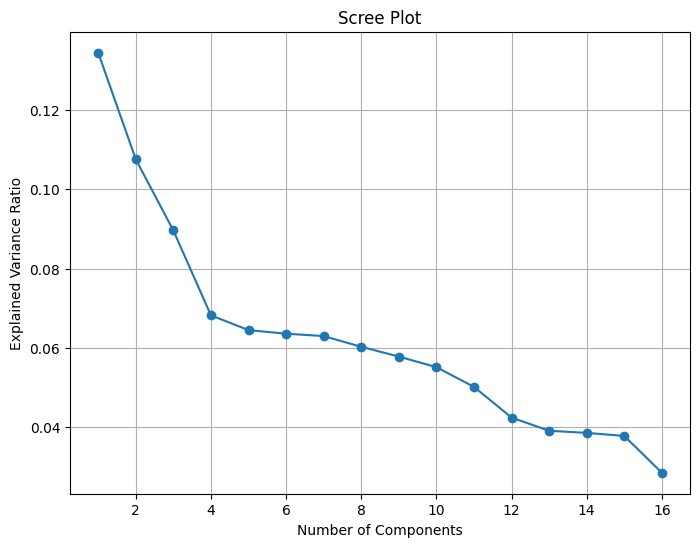

In [51]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

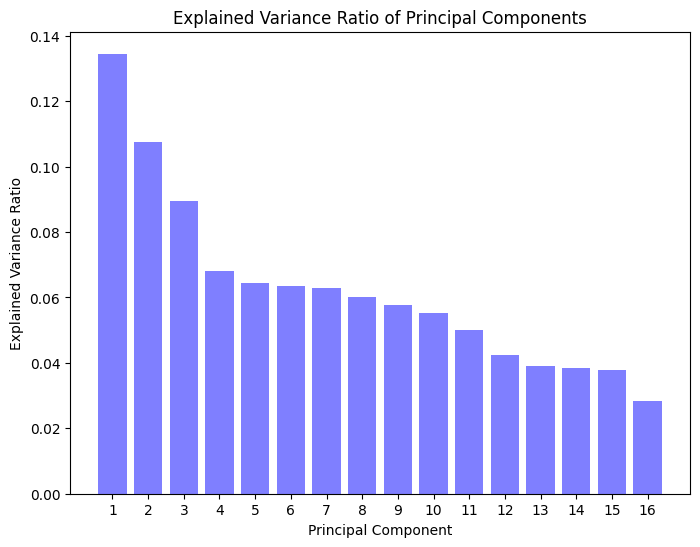

In [52]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='blue', alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()


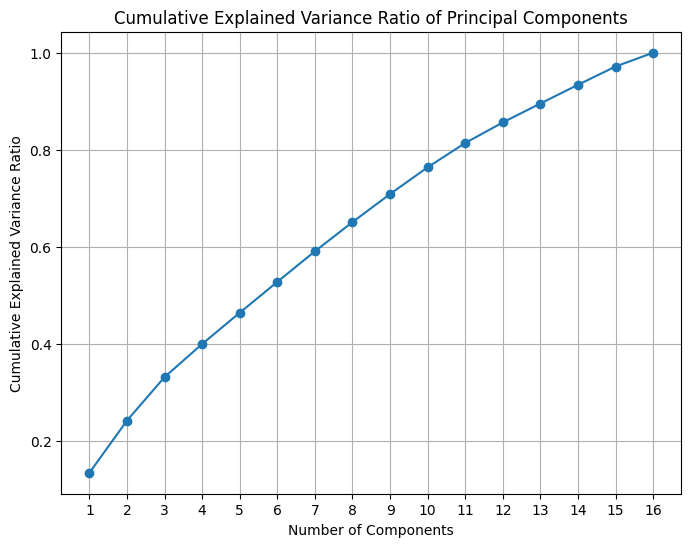

In [53]:

# Assuming pca is your PCA object
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio_cumulative) + 1))
plt.grid(True)
plt.show()


In [54]:
from sklearn.model_selection import train_test_split
#Split your data into features (X) and target variable (y)
X = scaled_df.drop(columns=['active_status'])  
y = df['active_status'] 

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools
# List to store results
results = []

# Calculate total number of combinations
total_combinations = sum(len(list(itertools.combinations(X.columns, r))) for r in range(1, 4))

# Initialize counter for tracking progress
progress_counter = 0

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # Logistic Regression
        lr_model = LogisticRegression()
        lr_model.fit(X_train[list(features)], y_train)
        lr_pred = lr_model.predict(X_test[list(features)])
        
        # Calculate evaluation metrics
        lr_accuracy = accuracy_score(y_test, lr_pred)
        lr_precision = precision_score(y_test, lr_pred)
        lr_recall = recall_score(y_test, lr_pred)
        lr_f1 = f1_score(y_test, lr_pred)

        for feature in features:
            results.append({
                'Feature': ', '.join(features),
                'Logistic Regression Accuracy': lr_accuracy,
                'Logistic Regression Precision': lr_precision,
                'Logistic Regression Recall': lr_recall,
                'Logistic Regression F1 Score': lr_f1
            })
# Update progress
        progress_counter += 1
        print(f"Progress: {progress_counter}/{total_combinations}")
# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)  # Display all rows without truncation
print(results_df)
# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Save DataFrame to a CSV file
results_df.to_csv("logistic_regression_results_SE.csv", index=False)

print("Results saved to 'logistic_regression_results_SE.csv'.")



Progress: 1/575
Progress: 2/575
Progress: 3/575
Progress: 4/575
Progress: 5/575
Progress: 6/575
Progress: 7/575
Progress: 8/575
Progress: 9/575
Progress: 10/575
Progress: 11/575
Progress: 12/575
Progress: 13/575
Progress: 14/575
Progress: 15/575
Progress: 16/575
Progress: 17/575
Progress: 18/575
Progress: 19/575
Progress: 20/575
Progress: 21/575
Progress: 22/575
Progress: 23/575
Progress: 24/575
Progress: 25/575
Progress: 26/575
Progress: 27/575
Progress: 28/575
Progress: 29/575
Progress: 30/575
Progress: 31/575
Progress: 32/575
Progress: 33/575
Progress: 34/575
Progress: 35/575
Progress: 36/575
Progress: 37/575
Progress: 38/575
Progress: 39/575
Progress: 40/575
Progress: 41/575
Progress: 42/575
Progress: 43/575
Progress: 44/575
Progress: 45/575
Progress: 46/575
Progress: 47/575
Progress: 48/575
Progress: 49/575
Progress: 50/575
Progress: 51/575
Progress: 52/575
Progress: 53/575
Progress: 54/575
Progress: 55/575
Progress: 56/575
Progress: 57/575
Progress: 58/575
Progress: 59/575
Progre

In [56]:
import itertools
from xgboost import XGBClassifier
# List to store results
results = []

# Calculate total number of combinations
total_combinations = sum(len(list(itertools.combinations(X.columns, r))) for r in range(1, 4))

# Initialize counter for tracking progress
progress_counter = 0

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # XGBoost Classifier
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train[list(features)], y_train)
        xgb_pred = xgb_model.predict(X_test[list(features)])
        
        # Calculate evaluation metrics
        xgb_accuracy = accuracy_score(y_test, xgb_pred)
        xgb_precision = precision_score(y_test, xgb_pred)
        xgb_recall = recall_score(y_test, xgb_pred)
        xgb_f1 = f1_score(y_test, xgb_pred)

        # Store results
        for feature in features:
            results.append({
                'Feature': ', '.join(features),
                'XGBoost Accuracy': xgb_accuracy,
                'XGBoost Precision': xgb_precision,
                'XGBoost Recall': xgb_recall,
                'XGBoost F1 Score': xgb_f1
            })
        
        # Update progress
        progress_counter += 1
        print(f"Progress: {progress_counter}/{total_combinations}")

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Save DataFrame to a CSV file
results_df.to_csv("xgboost_results_SE.csv", index=False)

print("Results saved to 'xgboost_results_SE.csv'.")

Progress: 1/575
Progress: 2/575
Progress: 3/575
Progress: 4/575
Progress: 5/575
Progress: 6/575
Progress: 7/575
Progress: 8/575
Progress: 9/575
Progress: 10/575
Progress: 11/575
Progress: 12/575
Progress: 13/575
Progress: 14/575
Progress: 15/575
Progress: 16/575
Progress: 17/575
Progress: 18/575
Progress: 19/575
Progress: 20/575
Progress: 21/575
Progress: 22/575
Progress: 23/575
Progress: 24/575
Progress: 25/575
Progress: 26/575
Progress: 27/575
Progress: 28/575
Progress: 29/575
Progress: 30/575
Progress: 31/575
Progress: 32/575
Progress: 33/575
Progress: 34/575
Progress: 35/575
Progress: 36/575
Progress: 37/575
Progress: 38/575
Progress: 39/575
Progress: 40/575
Progress: 41/575
Progress: 42/575
Progress: 43/575
Progress: 44/575
Progress: 45/575
Progress: 46/575
Progress: 47/575
Progress: 48/575
Progress: 49/575
Progress: 50/575
Progress: 51/575
Progress: 52/575
Progress: 53/575
Progress: 54/575
Progress: 55/575
Progress: 56/575
Progress: 57/575
Progress: 58/575
Progress: 59/575
Progre

In [57]:

# List to store results
results = []


# Calculate total number of combinations
total_combinations = sum(len(list(itertools.combinations(X.columns, r))) for r in range(1, 4))

# Initialize counter for tracking progress
progress_counter = 0

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
       # Random Forest Classifier
        rf_model = RandomForestClassifier()
        rf_model.fit(X_train[list(features)], y_train)
        rf_pred = rf_model.predict(X_test[list(features)])
        rf_accuracy = accuracy_score(y_test, rf_pred)
        rf_precision = precision_score(y_test, lr_pred)
        rf_recall = recall_score(y_test, lr_pred)
        rf_f1 = f1_score(y_test, lr_pred)
        
        # Store results
        for feature in features:
            results.append({
                'Feature': ', '.join(features),
                'Random Forest Accuracy': rf_accuracy,
                'Random Forest Precision': rf_precision,
                'Random Forest Recall': rf_recall,
                'Random Forest F1 Score': rf_f1
              })

        # Update progress
        progress_counter += 1
        print(f"Progress: {progress_counter}/{total_combinations}")

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)  # Display all rows without truncation
print(results_df)
# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Save DataFrame to a CSV file
results_df.to_csv("random_forest_results_SE.csv", index=False)

print("Results saved to 'random_forest_results_SE.csv'.")


Progress: 1/575
Progress: 2/575
Progress: 3/575
Progress: 4/575
Progress: 5/575
Progress: 6/575
Progress: 7/575
Progress: 8/575
Progress: 9/575
Progress: 10/575
Progress: 11/575
Progress: 12/575
Progress: 13/575
Progress: 14/575
Progress: 15/575
Progress: 16/575
Progress: 17/575
Progress: 18/575
Progress: 19/575
Progress: 20/575
Progress: 21/575
Progress: 22/575
Progress: 23/575
Progress: 24/575
Progress: 25/575
Progress: 26/575
Progress: 27/575
Progress: 28/575
Progress: 29/575
Progress: 30/575
Progress: 31/575
Progress: 32/575
Progress: 33/575
Progress: 34/575
Progress: 35/575
Progress: 36/575
Progress: 37/575
Progress: 38/575
Progress: 39/575
Progress: 40/575
Progress: 41/575
Progress: 42/575
Progress: 43/575
Progress: 44/575
Progress: 45/575
Progress: 46/575
Progress: 47/575
Progress: 48/575
Progress: 49/575
Progress: 50/575
Progress: 51/575
Progress: 52/575
Progress: 53/575
Progress: 54/575
Progress: 55/575
Progress: 56/575
Progress: 57/575
Progress: 58/575
Progress: 59/575
Progre

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


# List to store results
results = []

# Calculate total number of combinations
total_combinations = sum(len(list(itertools.combinations(X.columns, r))) for r in range(1, 4))

# Initialize counter for tracking progress
progress_counter = 0 

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # Define a simple neural network model
        model = Sequential([
            Dense(64, activation='relu', input_shape=(len(features),)),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        model.fit(X_train[list(features)], y_train, epochs=10, batch_size=32, verbose=0)

        # Evaluate the model
        nn_accuracy = model.evaluate(X_test[list(features)], y_test, verbose=0)[1]

        # Store results
        for feature in features:    
            results.append({
                'Feature': ', '.join(features),
                'Neural Network Accuracy': nn_accuracy
            })
        # Update progress
        progress_counter += 1
        print(f"Progress: {progress_counter}/{total_combinations}")
# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)
# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Save DataFrame to a CSV file
results_df.to_csv("NN_results_SE.csv", index=False)

print("Results saved to 'NN_results_SE.csv'.")







Progress: 1/575
Progress: 2/575
Progress: 3/575
Progress: 4/575
Progress: 5/575
Progress: 6/575
Progress: 7/575
Progress: 8/575
Progress: 9/575
Progress: 10/575
Progress: 11/575
Progress: 12/575
Progress: 13/575
Progress: 14/575
Progress: 15/575
Progress: 16/575
Progress: 17/575
Progress: 18/575
Progress: 19/575
Progress: 20/575
Progress: 21/575
Progress: 22/575
Progress: 23/575
Progress: 24/575
Progress: 25/575
Progress: 26/575
Progress: 27/575
Progress: 28/575
Progress: 29/575
Progress: 30/575
Progress: 31/575
Progress: 32/575
Progress: 33/575
Progress: 34/575
Progress: 35/575
Progress: 36/575
Progress: 37/575
Progress: 38/575
Progress: 39/575
Progress: 40/575
Progress: 41/575
Progress: 42/575
Progress: 43/575
Progress: 44/575
Progress: 45/575
Progress: 46/575
Progress: 47/575
Progress: 48/575
Progress: 49/575
Progress: 50/575
Progress: 51/575
Progress: 52/575
Progress: 53/575
Progress: 54/575
Progress: 55/575
Progress: 56/575
Progress: 57/575
Progress: 58/575
Progress: 59/575
P

In [ ]:
# Load results from CSV files
nn_results_df = pd.read_csv("NN_results_SE.csv")
rf_results_df = pd.read_csv("random_forest_results_SE.csv")
lr_results_df = pd.read_csv("logistic_regression_results_SE.csv")
gb_results_df = pd.read_csv("xgboost_results_SE.csv") 

# Function to get top 10 combinations with best evaluations
def get_top_10_combinations(results_df, model_name):
    # Sort results by evaluation metric (e.g., accuracy)
    sorted_results_df = results_df.sort_values(by=f'{model_name} Accuracy', ascending=False)
    # Get top 10 combinations
    top_10_combinations = sorted_results_df.head(10)
    return top_10_combinations

# Get top 10 combinations for each model
top_10_nn_combinations = get_top_10_combinations(nn_results_df, 'Neural Network')
top_10_rf_combinations = get_top_10_combinations(rf_results_df, 'Random Forest')
top_10_lr_combinations = get_top_10_combinations(lr_results_df, 'Logistic Regression')
top_10_gb_combinations = get_top_10_combinations(gb_results_df, 'XGBoost')  

# Print top 10 combinations for each model
print("Top 10 Neural Network Combinations:")
print(top_10_nn_combinations)

print("\nTop 10 Random Forest Combinations:")
print(top_10_rf_combinations)

print("\nTop 10 Logistic Regression Combinations:")
print(top_10_lr_combinations)

print("\nTop 10 Gradient Boosting Combinations:")
print(top_10_gb_combinations)


In [ ]:
# Open a text file for writing
with open("evaluation_of_small_enterprises.txt", "w") as file:
    # Write top 10 Neural Network combinations
    file.write("Top 10 Neural Network Combinations:\n")
    file.write(top_10_nn_combinations.to_string(index=False))
    file.write("\n\n")
    
    # Write top 10 Random Forest combinations
    file.write("Top 10 Random Forest Combinations:\n")
    file.write(top_10_rf_combinations.to_string(index=False))
    file.write("\n\n")

    # Write top 10 Logistic Regression combinations
    file.write("Top 10 Logistic Regression Combinations:\n")
    file.write(top_10_lr_combinations.to_string(index=False))
    file.write("\n\n")

    # Write top 10 Gradient Boosting Combinations
    file.write("Top 10 Gradient Boosting Combinations:\n")
    file.write(top_10_gb_combinations.to_string(index=False))

print("Results saved to 'evaluation_of_small_enterprises.txt'.")

